# This is for Lab 6

In [3]:
!pip install scikit-learn # ML library featuring classification, regression, clustering including support vector machine, random forest, gradient boosting, k-means, DBSCAN
!pip install --upgrade pixiedust # open-source helper library, add-on to Jupyter notebook to improve UX working with data
!pip install seaborn

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [4]:
import pixiedust
import sklearn
import pandas as pd

from sklearn.ensemble import RandomForestClassifier # ML algorithm for both classification and regression tasks
import numpy as np # for large, multi-dimensional arrays and matrices, and high-level mathematical functions
from sklearn.model_selection import train_test_split # for splitting data arrays into two subsets: for training data and for testing data
from scipy.io import arff # scientific computation library that uses NumPy underneath

ModuleNotFoundError: No module named 'pixiedust'

In [13]:
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')

Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'


In [14]:
raw_df.head()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,ADDR_STREET_NUMBER,ADDR_STREET_NAME,ADDR_UNIT_DESIGNATION,ADDR_UNIT_NUMBER,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25 00:00:00.0,2017-04-28 00:00:00.0,...,2153,MALLARD LN,NaN,NaN,HANOVER PARK,IL,60133,41.943656,-88.158922,-88.158922
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26 00:00:00.0,2018-08-31 00:00:00.0,...,13886,W EMMA LN,NaN,NaN,METTAWA,IL,60045,42.249667,-87.903629,-87.903629
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07 00:00:00.0,2016-01-11 00:00:00.0,...,8726,S DORCHESTER AVE,NaN,NaN,CHICAGO,IL,60619,41.736025,-87.590889,-87.590889
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11 00:00:00.0,2016-12-18 00:00:00.0,...,543,N HARDING AVE,NaN,NaN,CHICAGO,IL,60624,41.891161,-87.724383,-87.724383
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06 00:00:00.0,2017-06-08 00:00:00.0,...,6952,S HALSTED ST,NaN,NaN,CHICAGO,IL,60621,41.767273,-87.644831,-87.644831


In [15]:
display(raw_df)

In [16]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["EXPIRY_DATE"] = pd.to_datetime(raw_df["EXPIRY_DATE"])
raw_df["LOSS_EVENT_TIME"] = pd.to_datetime(raw_df["LOSS_EVENT_TIME"])
raw_df["DAYS_FROM_LOSS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["EXPIRY_DATE"]
raw_df["DAYS_FROM_LOSS"] = abs(raw_df.DAYS_FROM_LOSS.dt.days)
raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'] = 1 # Not Fraud
raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'] = 0 # Fraud

In [18]:
import math
help (math)

Help on module math:

NAME
    math

MODULE REFERENCE
    https://docs.python.org/3.7/library/math
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
    

In [58]:
notfraud = len(raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'])
notfraud

915

In [64]:
Fraud = len(raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'])
Fraud

60

In [19]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [24]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["DRIVERS_LICENSE_EXPIRY"] = pd.to_datetime(raw_df["DRIVERS_LICENSE_EXPIRY"])
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df["DRIVERS_LICENSE_EXPIRY"] - raw_df["LOSS_EVENT_TIME"]
raw_df["DAYS_FROM_L_EXPIRY"] 

0      481 days
1     -211 days
2     1412 days
3      886 days
4     1126 days
         ...   
970    571 days
971   1097 days
972   1219 days
973   1332 days
974   1478 days
Name: DAYS_FROM_L_EXPIRY, Length: 975, dtype: timedelta64[ns]

In [25]:
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df.DAYS_FROM_L_EXPIRY.dt.days
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] >= 0, 'EXPIRED_LICENSE'] = 0 # not Expired
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] < 0, 'EXPIRED_LICENSE'] = 1 # Expired

In [26]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["EXPIRED_LICENSE"].value_counts()

0.0    936
1.0     39
Name: EXPIRED_LICENSE, dtype: int64

In [27]:
# Days living at current address (date of loss - insurance_driver.date_at_current_address)
raw_df["DATE_AT_CURRENT_ADDRESS"] = pd.to_datetime(raw_df["DATE_AT_CURRENT_ADDRESS"])
raw_df["DAYS_AT_ADDRESS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["DATE_AT_CURRENT_ADDRESS"]
raw_df["DAYS_AT_ADDRESS"] = abs(raw_df.DAYS_AT_ADDRESS.dt.days)
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] >= 15, 'SUSPICIOUS_LIVING'] = 1 # Low change of Address
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] < 15, 'SUSPICIOUS_LIVING'] = 0 # Freq change of Address

In [28]:
# Frequent changes of residence
raw_df["SUSPICIOUS_LIVING"].value_counts()

1.0    973
0.0      2
Name: SUSPICIOUS_LIVING, dtype: int64

In [29]:
# High mileage at loss event for a policyholder with a low mileage discount

#7500/year
raw_df["START_DATE"] = pd.to_datetime(raw_df["START_DATE"])
#find number of days between policy creation and accident
raw_df["LENGTH_OF_POLICY"]=(raw_df["LOSS_EVENT_TIME"] - raw_df["START_DATE"]).dt.days
#convert to years
raw_df["LENGTH_OF_POLICY"]=raw_df["LENGTH_OF_POLICY"]/365
#divide Odometer at loss by years
raw_df["MILES/YEAR"] = raw_df["ODOMETER_AT_LOSS"]/raw_df["LENGTH_OF_POLICY"]
raw_df["MILES/YEAR"].value_counts()

145432.118234    1
234953.253233    1
55515.574648     1
123525.401515    1
198472.566993    1
                ..
98941.082789     1
100299.475188    1
61050.847328     1
54548.889011     1
170432.357027    1
Name: MILES/YEAR, Length: 975, dtype: int64

In [30]:
# Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the point of loss
raw_df.loc[raw_df["MILES/YEAR"] <7500, 'LOW_MILEAGE_AT_LOSS'] = 1 # Low Mileage
raw_df.loc[raw_df["MILES/YEAR"] >=7500, 'LOW_MILEAGE_AT_LOSS'] = 0 # High Mileage

In [31]:
raw_df["LOW_MILEAGE_AT_LOSS"].value_counts()

0.0    975
Name: LOW_MILEAGE_AT_LOSS, dtype: int64

In [32]:
raw_df.loc[raw_df["LOW_MILEAGE_USE"]==raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 0 # Potential Genuine as the low mileage use column is equivalent and assigned value of 0
raw_df.loc[raw_df["LOW_MILEAGE_USE"]!=raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 1 # Potential Fraud as the low mileage use is not equal to the mileage use column shown, and assigned as 1

In [33]:
# High mileage at loss event for a policyholder with a low mileage discount
raw_df["SUSPICIOUS_MILEAGE"].value_counts()

0.0    885
1.0     90
Name: SUSPICIOUS_MILEAGE, dtype: int64

In [35]:
raw_df.loc[raw_df["CLAIM_AMOUNT"] <3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 0 # Genuine Claim
raw_df.loc[raw_df["CLAIM_AMOUNT"] >=3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 1 # Excessive Claim

In [36]:
# High number of previous claims
raw_df["EXCESSIVE_CLAIM_AMOUNT"].value_counts()

0.0    547
1.0    428
Name: EXCESSIVE_CLAIM_AMOUNT, dtype: int64

In [39]:
# dataframes for certain features
features = ['FLAG_FOR_FRAUD_INV',
'SUSPICIOUS_MILEAGE',
'EXPIRED_LICENSE',
'SUSPICIOUS_CLAIM_TIME',
'SUSPICIOUS_LIVING',
'EXCESSIVE_CLAIM_AMOUNT']

In [40]:
df_model = raw_df[features]
df_model

,FLAG_FOR_FRAUD_INV,SUSPICIOUS_MILEAGE,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,EXCESSIVE_CLAIM_AMOUNT
0,1,0.0,0.0,1.0,1.0,1.0
1,0,0.0,1.0,1.0,1.0,0.0
2,1,1.0,0.0,1.0,1.0,1.0
3,1,0.0,0.0,1.0,1.0,1.0
4,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...
970,1,0.0,0.0,1.0,1.0,1.0
971,0,0.0,0.0,1.0,1.0,0.0
972,1,0.0,0.0,0.0,1.0,1.0
973,0,0.0,0.0,1.0,1.0,0.0


In [41]:
#ensure all relevant features are integers
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype
df_model[["SUSPICIOUS_LIVING"]] = df_model[["SUSPICIOUS_LIVING"]].astype(int)
df_model[["EXPIRED_LICENSE"]] = df_model[["EXPIRED_LICENSE"]].astype(int)
df_model[["SUSPICIOUS_CLAIM_TIME"]] = df_model[["SUSPICIOUS_CLAIM_TIME"]].astype(int)
df_model[["SUSPICIOUS_MILEAGE"]] = df_model[["SUSPICIOUS_MILEAGE"]].astype(int)
df_model[["EXCESSIVE_CLAIM_AMOUNT"]] = df_model[["EXCESSIVE_CLAIM_AMOUNT"]].astype(int)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
raw_df.groupby("FLAG_FOR_FRAUD_INV", as_index=False).mean()

,FLAG_FOR_FRAUD_INV,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,...,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,2.926186,NaN,2.977153,180783.846046,0.281195,1.492091,41.857895,-87.675014,2521.147627,...,0.933216,894.546573,0.042179,3487.956063,0.996485,1.070159,205170.356701,0.0,0.094903,0.086116
1,1,3.041872,NaN,1.103448,175504.046305,0.637931,1.758621,41.860133,-87.679617,26429.480296,...,0.945813,917.960591,0.036946,3252.413793,1.000000,0.960490,230687.578997,0.0,0.088670,0.933498


In [43]:
#split data into x and y variables
xVar = df_model[["EXPIRED_LICENSE","SUSPICIOUS_CLAIM_TIME","SUSPICIOUS_LIVING","SUSPICIOUS_MILEAGE","EXCESSIVE_CLAIM_AMOUNT"]]
yVar = df_model["FLAG_FOR_FRAUD_INV"]

In [44]:
xVar.head()

,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,1,1,0,1
1,1,1,1,0,0
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,0


In [46]:
yVar.head()

0    1
1    0
2    1
3    1
4    0
Name: FLAG_FOR_FRAUD_INV, dtype: int64

In [47]:
#split into a test/train set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(780, 5) (780,)
(195, 5) (195,)


In [49]:
X_train.shape, y_train.shape

((780, 5), (780,))

In [50]:
#train model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# n_estimatorsint, default=100; The number of trees in the forest.
# https://scikit-learn.org/stable/glossary.html#term-random_state
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [53]:
#create confusion matrix to gut check model
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,102,11
1,5,77


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[102,  11],
       [  5,  77]])

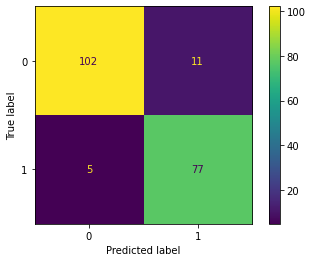

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

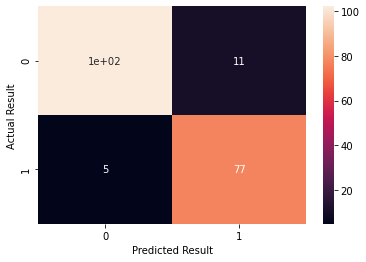

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)


import seaborn as sn
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()